In [1]:
import pandas as pd
df = pd.read_csv("../data/sentiment_results.csv")

__Pozitif/Negatif/Nötr dağılım grafiklerinin oluşturulması__

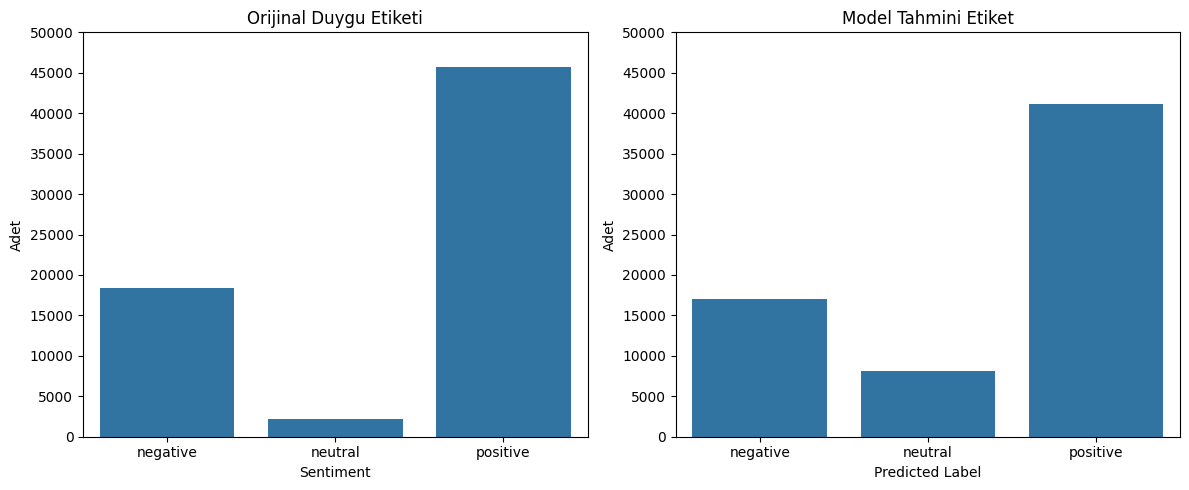

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 5))

yticks = np.arange(0, 50001, 5000) 

plt.subplot(1, 2, 1)
sns.countplot(x='sentiment', data=df)
plt.title("Orijinal Duygu Etiketi")
plt.ylim(0, 50000)
plt.yticks(yticks)
plt.xlabel("Sentiment")
plt.ylabel("Adet")

plt.subplot(1, 2, 2)
sns.countplot(x='normalized_pred_label', data=df)
plt.title("Model Tahmini Etiket")
plt.ylim(0, 50000)
plt.yticks(yticks)
plt.xlabel("Predicted Label")
plt.ylabel("Adet")

plt.tight_layout()
plt.show()


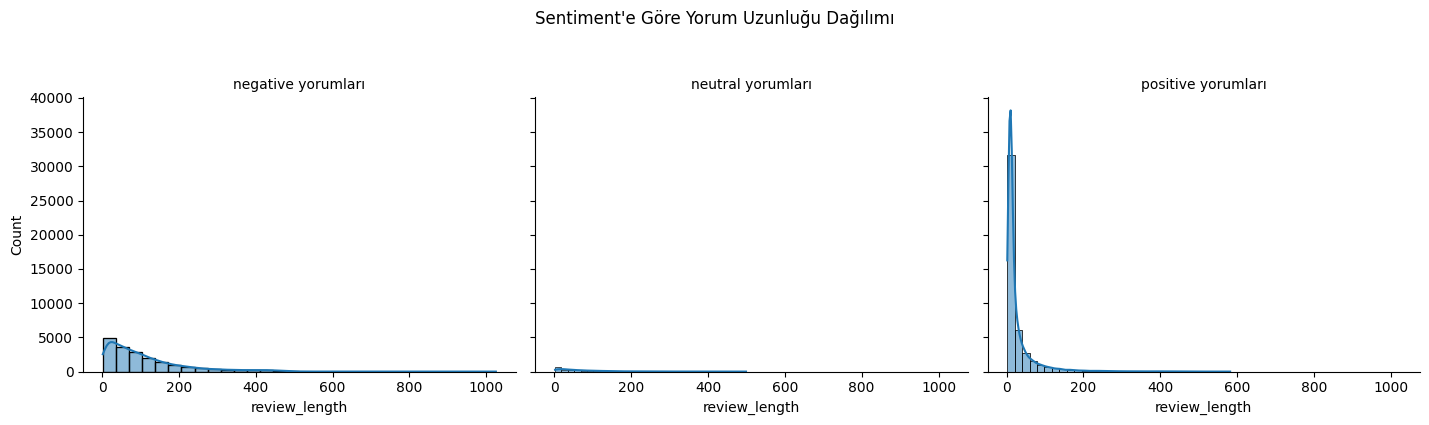

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df, col='sentiment', height=4, aspect=1.2)
g.map(sns.histplot, 'review_length', bins=30, kde=True)
g.set_titles(col_template="{col_name} yorumları")
plt.suptitle("Sentiment'e Göre Yorum Uzunluğu Dağılımı", y=1.05)
plt.tight_layout()
plt.show()


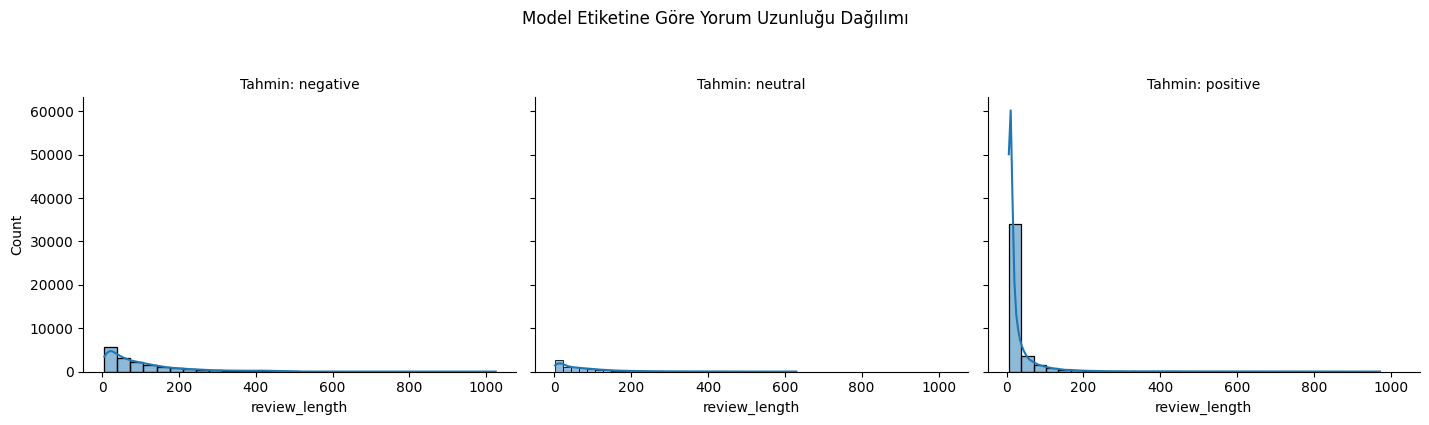

In [4]:
g = sns.FacetGrid(df, col='normalized_pred_label', height=4, aspect=1.2)
g.map(sns.histplot, 'review_length', bins=30, kde=True)
g.set_titles(col_template="Tahmin: {col_name}")
plt.suptitle("Model Etiketine Göre Yorum Uzunluğu Dağılımı", y=1.05)
plt.tight_layout()
plt.show()

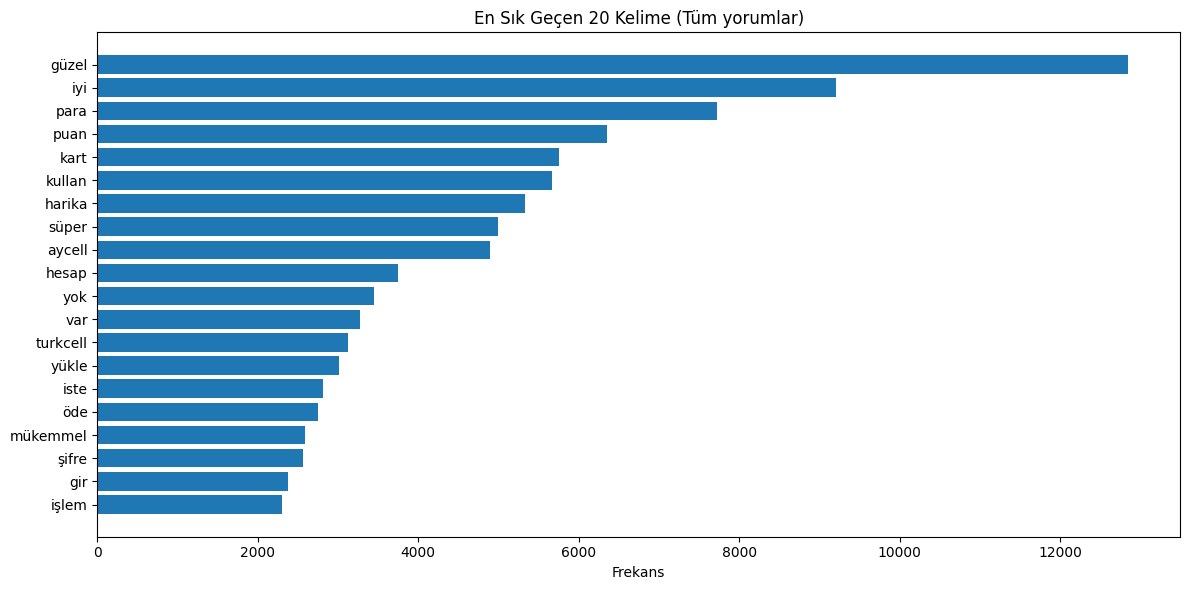

In [5]:
from collections import Counter
import matplotlib.pyplot as plt
import ast

all_words = []
for lem in df['lemmas']:
    words = ast.literal_eval(lem)
    all_words.extend([w.lower().strip() for w in words if w.isalpha()])  

word_freq = Counter(all_words)

top_words = word_freq.most_common(20)

words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
plt.barh(words[::-1], counts[::-1])  
plt.xlabel("Frekans")
plt.title("En Sık Geçen 20 Kelime (Tüm yorumlar)")
plt.tight_layout()
plt.show()


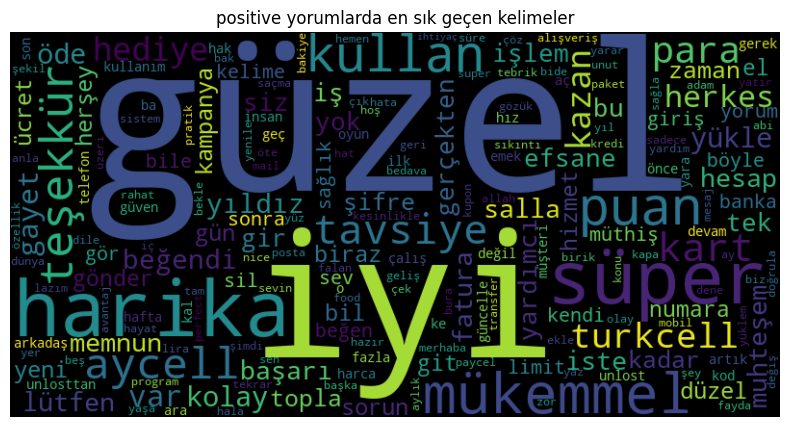

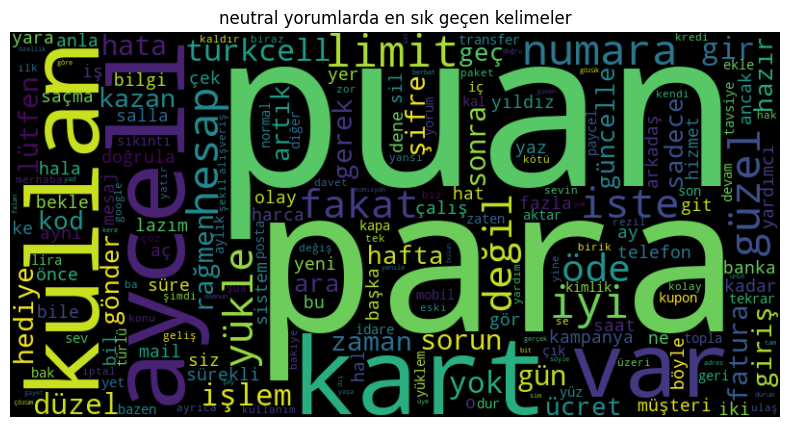

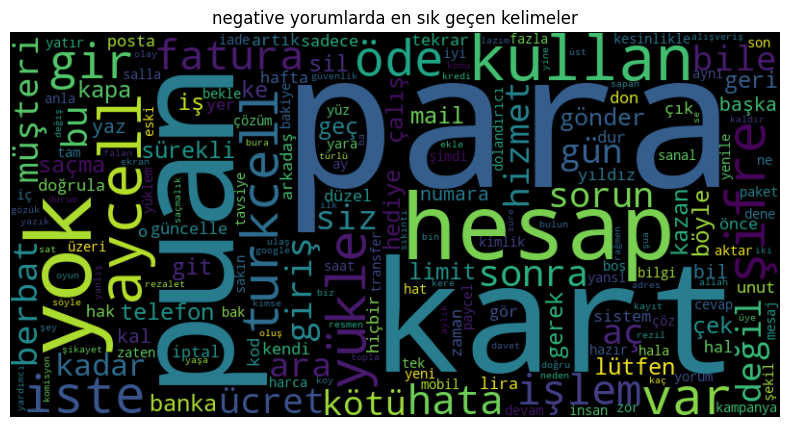

In [6]:
from wordcloud import WordCloud
import ast

for label in ['positive', 'neutral', 'negative']:
    # Lemma listesini düzleştir + normalize
    lemmas = df[df['normalized_pred_label'] == label]['lemmas']
    
    all_words = []
    for lem in lemmas:
        try:
            words = ast.literal_eval(lem) if isinstance(lem, str) else lem
            words = [w.lower().strip() for w in words if w.isalpha()]
            all_words.extend(words)
        except:
            continue
    
    text = " ".join(all_words)
    
    wc = WordCloud(width=800, height=400, collocations=False).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{label} yorumlarda en sık geçen kelimeler')
    plt.show()


In [7]:
df

,lemmas,sentiment,review_length,normalized_pred_label,Tarih
0,"['şua', 'sorun', 'var', 'banka', 'kart', 'para...",negative,176,negative,2025-07-07 10:25:20
1,"['türlü', 'dekont', 'yer', 'öde', 'dair', 'dek...",negative,95,neutral,2025-07-07 09:08:45
2,"['hafta', 'aç', 'çalışıyum', 'aç', 'güvenlik',...",negative,156,positive,2025-07-06 22:22:35
3,"['yabancı', 'doğrula']",negative,22,neutral,2025-07-06 20:02:06
4,"['şifre', 'güncelle', 'guncelletmiuorsunuz', '...",neutral,52,negative,2025-07-06 18:34:42
...,...,...,...,...,...
66289,['güzel'],positive,9,positive,2017-08-25 10:43:11
66290,"['mobil', 'öde', 'bakiye', 'işlem', 'tarihçe',...",positive,82,positive,2017-08-19 15:08:30
66291,['besleme'],positive,11,neutral,2017-08-17 06:38:45
66292,"['fin', 'hit']",positive,14,positive,2017-08-16 20:23:34


<Axes: xlabel='pca1', ylabel='pca2'>

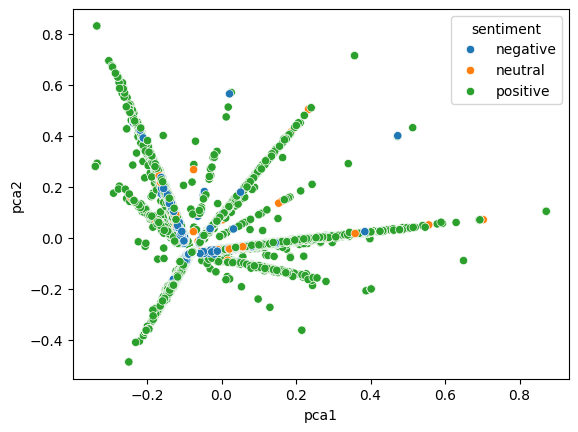

In [8]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# TF-IDF
texts = [" ".join(eval(l)) for l in df['lemmas']]
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X.toarray())

# Görselleştir
import matplotlib.pyplot as plt
import seaborn as sns
df['pca1'], df['pca2'] = X_2d[:, 0], X_2d[:, 1]

sns.scatterplot(data=df, x='pca1', y='pca2', hue='sentiment')

<Axes: xlabel='Tarih'>

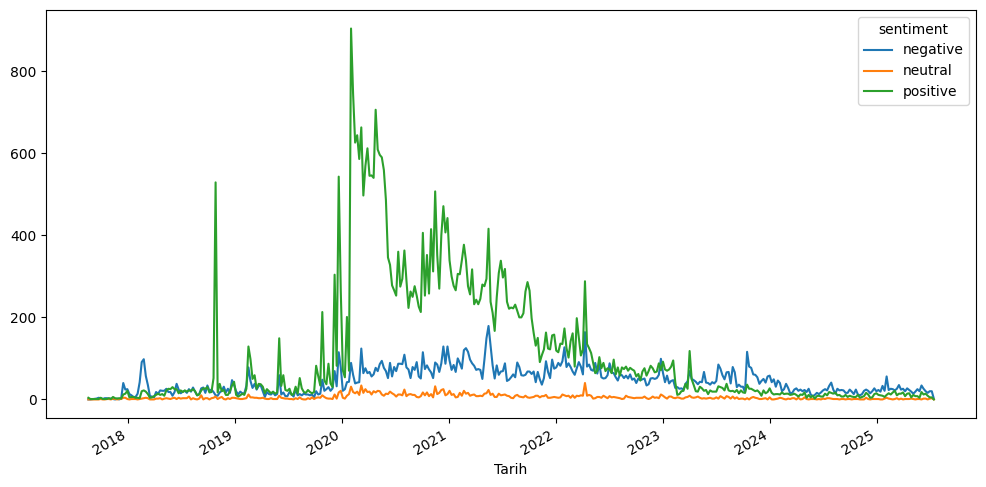

In [9]:
df_temp = df.copy()
df_temp['Tarih'] = pd.to_datetime(df_temp['Tarih'])
df_temp.set_index('Tarih', inplace=True)

df_temp.resample('W')['sentiment'].value_counts().unstack().fillna(0).plot(figsize=(12, 6))


In [10]:
df

,lemmas,sentiment,review_length,normalized_pred_label,Tarih,pca1,pca2
0,"['şua', 'sorun', 'var', 'banka', 'kart', 'para...",negative,176,negative,2025-07-07 10:25:20,-0.089240,-0.064101
1,"['türlü', 'dekont', 'yer', 'öde', 'dair', 'dek...",negative,95,neutral,2025-07-07 09:08:45,-0.083203,-0.059361
2,"['hafta', 'aç', 'çalışıyum', 'aç', 'güvenlik',...",negative,156,positive,2025-07-06 22:22:35,-0.085019,-0.061258
3,"['yabancı', 'doğrula']",negative,22,neutral,2025-07-06 20:02:06,-0.078844,-0.055444
4,"['şifre', 'güncelle', 'guncelletmiuorsunuz', '...",neutral,52,negative,2025-07-06 18:34:42,-0.080762,-0.056988
...,...,...,...,...,...,...,...
66289,['güzel'],positive,9,positive,2017-08-25 10:43:11,0.871616,0.104284
66290,"['mobil', 'öde', 'bakiye', 'işlem', 'tarihçe',...",positive,82,positive,2017-08-19 15:08:30,0.037875,-0.037257
66291,['besleme'],positive,11,neutral,2017-08-17 06:38:45,-0.077516,-0.054101
66292,"['fin', 'hit']",positive,14,positive,2017-08-16 20:23:34,-0.077531,-0.054115


<Axes: xlabel='Tarih'>

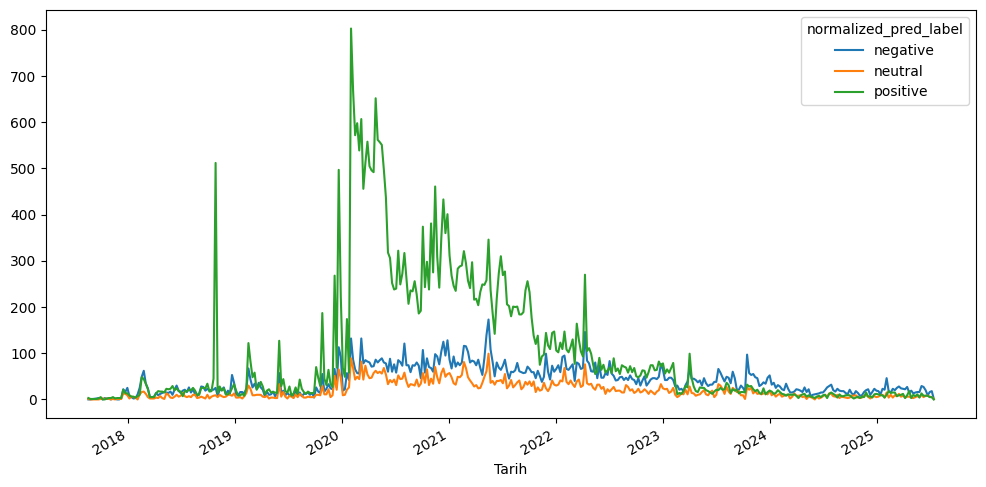

In [11]:
df_temp = df.copy()
df_temp['Tarih'] = pd.to_datetime(df_temp['Tarih'])
df_temp.set_index('Tarih', inplace=True)

df_temp.resample('W')['normalized_pred_label'].value_counts().unstack().fillna(0).plot(figsize=(12, 6))
